## Access Radar Coralcoast Velocity Hourly Averaged Delayed QC data in Zarr
A jupyter notebook to show how to access and plot the AODN radar_CoralCoast_velocity_hourly_averaged_delayed_qc dataset available as a [Zarr](https://zarr.dev/) dataset on S3.

More information about the dataset available [here](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/f7b36a1c-0936-4da6-b47f-94ed538b367e).

In [1]:
dataset_name = "radar_CoralCoast_velocity_hourly_averaged_delayed_qc"

In [2]:
import xarray as xr
import fsspec

## Install/Update packages and Load common functions

In [3]:
# only run once, then restart session if needed
!pip install uv

import os
import sys

def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

# Get the current directory of the notebook
current_dir = os.getcwd()

# Check if requirements.txt exists in the current directory
local_requirements = os.path.join(current_dir, 'requirements.txt')
if os.path.exists(local_requirements):
    requirements_path = local_requirements
else:
    # Fall back to the online requirements.txt file
    requirements_path = 'https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/requirements.txt'

# Install packages using uv and the determined requirements file
if is_colab():
    xr.set_options(display_style='text')
    os.system(f'uv pip install --system -r {requirements_path}')
else:
    os.system('uv venv')
    os.system(f'uv pip install -r {requirements_path}')

Using CPython 3.12.6 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Audited 232 packages in 30ms


In [4]:
import requests
import os
if not os.path.exists('DataQuery.py'):
  print('Downloading DataQuery.py')
  url = 'https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/aodn_cloud_optimised/lib/DataQuery.py'
  response = requests.get(url)
  with open('DataQuery.py', 'w') as f:
      f.write(response.text)

In [5]:
from DataQuery import create_timeseries, plot_time_coverage, plot_gridded_radar_velocity, plot_radar_velocity_rose

In [6]:
# remote zarr dataset
url = f's3://aodn-cloud-optimised/{dataset_name}.zarr/'
ds = xr.open_zarr(fsspec.get_mapper(url, anon=True), consolidated=True)
ds

<xarray.Dataset> Size: 2GB
Dimensions:               (TIME: 4514, I: 73, J: 65)
Coordinates:
  * I                     (I) int32 292B 1 2 3 4 5 6 7 ... 67 68 69 70 71 72 73
  * J                     (J) int32 260B 1 2 3 4 5 6 7 ... 59 60 61 62 63 64 65
    LATITUDE              (I, J) float64 38kB dask.array<chunksize=(73, 65), meta=np.ndarray>
    LONGITUDE             (I, J) float64 38kB dask.array<chunksize=(73, 65), meta=np.ndarray>
  * TIME                  (TIME) datetime64[ns] 36kB 2019-04-18T09:00:00 ... ...
Data variables:
    GDOP                  (TIME, I, J) float64 171MB dask.array<chunksize=(100, 73, 65), meta=np.ndarray>
    NOBS1                 (TIME, I, J) float64 171MB dask.array<chunksize=(100, 73, 65), meta=np.ndarray>
    NOBS2                 (TIME, I, J) float64 171MB dask.array<chunksize=(100, 73, 65), meta=np.ndarray>
    UCUR                  (TIME, I, J) float64 171MB dask.array<chunksize=(100, 73, 65), meta=np.ndarray>
    UCUR_quality_control  (TIME, I, J) float64 171MB dask.array<chunksize=(100, 73, 65), meta=np.ndarray>
    UCUR_sd               (TIME, I, J) float64 171MB dask.array<chunksize=(100, 73, 65), meta=np.ndarray>
    VCUR                  (TIME, I, J) float64 171MB dask.array<chunksize=(100, 73, 65), meta=np.ndarray>
    VCUR_quality_control  (TIME, I, J) float64 171MB dask.array<chunksize=(100, 73, 65), meta=np.ndarray>
    VCUR_sd               (TIME, I, J) float64 171MB dask.array<chunksize=(100, 73, 65), meta=np.ndarray>
    filename              (TIME) <U54 975kB dask.array<chunksize=(100,), meta=np.ndarray>
Attributes: (12/40)
    Conventions:                   CF-1.6,IMOS-1.4
    abstract:                      The ACORN facility is producing NetCDF fil...
    acknowledgement:               Any users (including re-packagers) of IMOS...
    author:                        Cosoli, Simone
    author_email:                  simone.cosoli@uwa.edu.au
    citation:                      The citation in a list of references is: I...
    ...                            ...
    source:                        Terrestrial HF radar
    ssr_Stations:                  Dongara (DONG), Green Head (GHED)
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    time_coverage_end:             2019-04-18T09:00:00Z
    time_coverage_start:           2019-04-18T09:00:00Z
    title:                         IMOS ACORN Coral Coast (CORL), one hour av...

## Plot time coverage

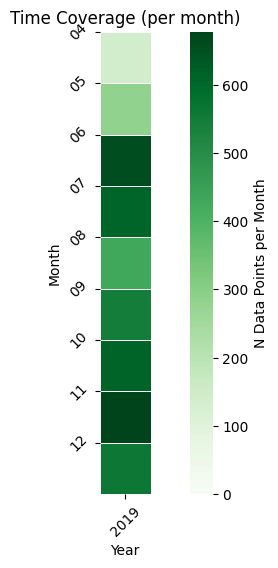

In [7]:
plot_time_coverage(ds, time_var="TIME")

## Plot a gridded variable

/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:620: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the colorbar


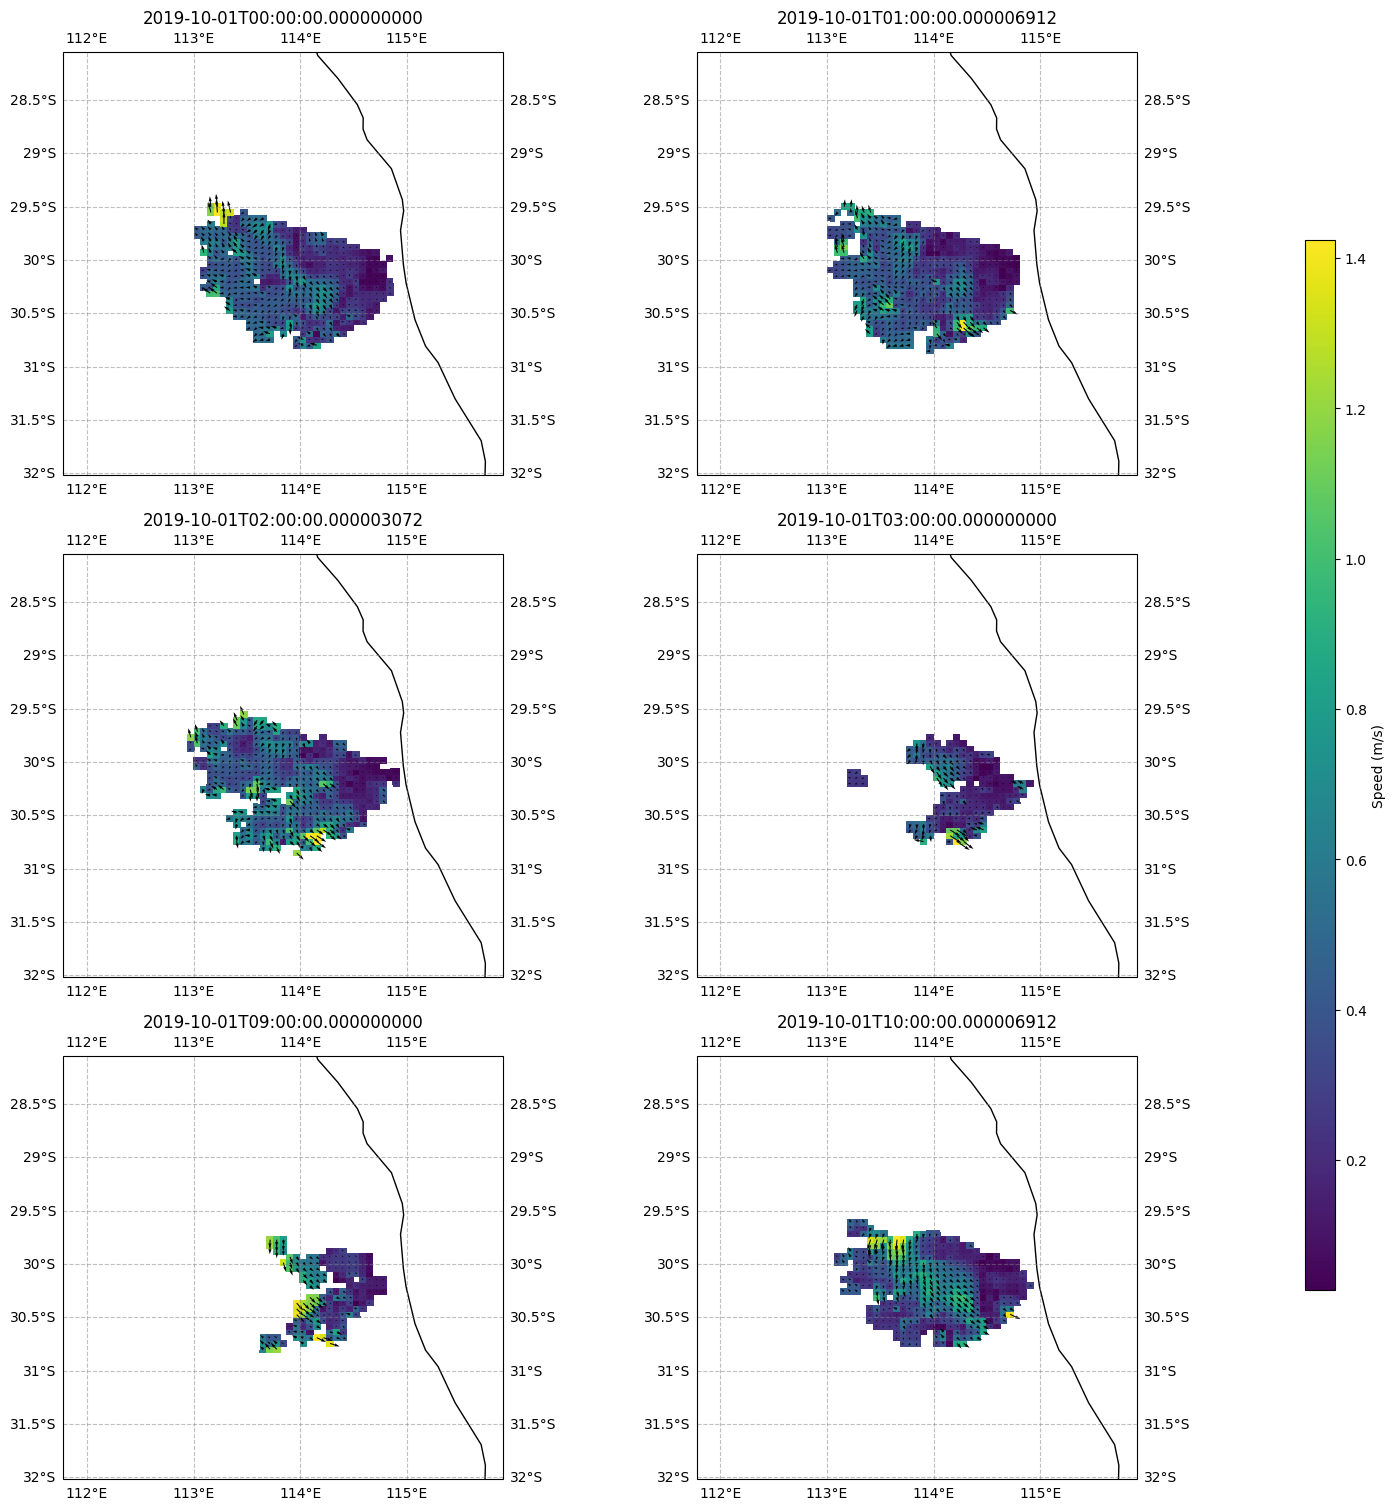

In [8]:
plot_gridded_radar_velocity(ds, time_start='2019-10-01T00:00:00')

<Figure size 800x800 with 0 Axes>

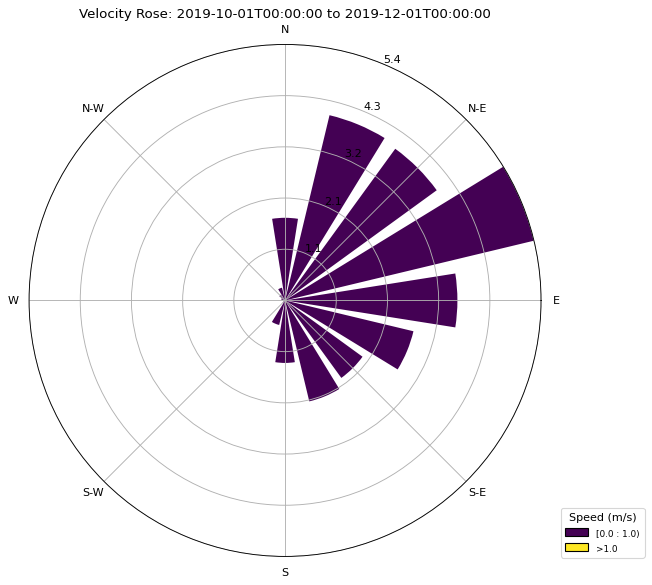

In [9]:
plot_radar_velocity_rose(ds, time_start='2019-10-01T00:00:00', time_end='2019-12-01T00:00:00')